In [149]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# load file 
path_df = "merged_NYC_data.csv"

NYC_df = pd.read_csv(path_df)

for col in NYC_df.columns:
    NYC_df[col] = NYC_df[col].fillna('N/A')

NYC_df.head()

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BX_CASE_COUNT,BX_DEATH_COUNT,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,PATROL BORO BRONX,65+,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0
1,1,479875746,2/29/2020,ROBBERY,UNKNOWN,BLACK,M,PATROL BORO BKLYN NORTH,25-44,BLACK,...,0,0,0,0,1,0,0,0,0,0
2,2,246890158,2/29/2020,OFF. AGNST PUB ORD SENSBLTY &,25-44,UNKNOWN,U,PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,...,0,0,0,0,1,0,0,0,0,0
3,3,125238605,2/29/2020,PETIT LARCENY,N/A,N/A,N/A,PATROL BORO STATEN ISLAND,65+,WHITE,...,0,0,0,0,1,0,0,0,0,0
4,4,339344566,2/29/2020,GRAND LARCENY,N/A,N/A,N/A,PATROL BORO BRONX,25-44,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0


In [150]:
#NYC_df.replace(to_replace=r'PATROL BORO BRONX', value='BRONX', regex=True)
#NYC_df.replace(to_replace=r'PATROL BORO BRONX', value='BRONX', regex=True)
# patrol_boro_list = NYC_df['PATROL_BORO'].unique()
# patrol_boro_list

# for patrol_boro in patrol_boro_list:
#     if NYC_df.loc(['PATROL_BORO'] == patrol_boro)
    

NYC_df=NYC_df.replace(to_replace=r'PATROL BORO BRONX', value='BX', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO BKLYN NORTH', value='BK', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO BKLYN SOUTH', value='BK', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO MAN SOUTH', value='MN', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO MAN NORTH', value='MN', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO QUEENS NORTH', value='QN', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO QUEENS SOUTH', value='QN', regex=True)
NYC_df=NYC_df.replace(to_replace=r'PATROL BORO STATEN ISLAND', value='SI', regex=True)

NYC_df["PATROL_BORO"].unique()

array(['BX', 'BK', 'MN', 'SI', 'QN', 'N/A'], dtype=object)

In [151]:
NYC_df

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BX_CASE_COUNT,BX_DEATH_COUNT,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,BX,65+,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0
1,1,479875746,2/29/2020,ROBBERY,UNKNOWN,BLACK,M,BK,25-44,BLACK,...,0,0,0,0,1,0,0,0,0,0
2,2,246890158,2/29/2020,OFF. AGNST PUB ORD SENSBLTY &,25-44,UNKNOWN,U,MN,UNKNOWN,UNKNOWN,...,0,0,0,0,1,0,0,0,0,0
3,3,125238605,2/29/2020,PETIT LARCENY,N/A,N/A,N/A,SI,65+,WHITE,...,0,0,0,0,1,0,0,0,0,0
4,4,339344566,2/29/2020,GRAND LARCENY,N/A,N/A,N/A,BX,25-44,WHITE HISPANIC,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229678,229678,269176196,9/29/2020,HARRASSMENT 2,45-64,WHITE,M,BK,25-44,WHITE,...,64,3,334,2,81,0,174,2,33,0
229679,229679,234139730,9/29/2020,DANGEROUS WEAPONS,25-44,WHITE,M,MN,UNKNOWN,UNKNOWN,...,64,3,334,2,81,0,174,2,33,0
229680,229680,796495481,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,25-44,BLACK,F,BK,25-44,BLACK,...,64,3,334,2,81,0,174,2,33,0
229681,229681,552821323,9/29/2020,PETIT LARCENY,UNKNOWN,BLACK,M,MN,UNKNOWN,UNKNOWN,...,64,3,334,2,81,0,174,2,33,0


In [152]:
# caculate
bx_case = NYC_df["BX_CASE_COUNT"][229681]
bx_death = NYC_df["BX_DEATH_COUNT"][229681]
bk_case = NYC_df["BK_CASE_COUNT"][229681]
bk_death = NYC_df["BK_DEATH_COUNT"][229681]
mn_case = NYC_df["MN_CASE_COUNT"][229681]
mn_death = NYC_df["MN_DEATH_COUNT"][229681]
qn_case = NYC_df["QN_CASE_COUNT"][229681]
qn_death = NYC_df["QN_DEATH_COUNT"][229681]
si_case = NYC_df["SI_CASE_COUNT"][229681]
si_death = NYC_df["SI_DEATH_COUNT"][229681]
total_covid_case = bx_case + bk_case + mn_case + qn_case + si_case 
total_covid_death = bx_death + bk_death + mn_death + qn_death + si_death

# Feb/29 ~ Sep/29
case_death_df = pd.DataFrame({"BX_COVID_Case" : [bx_case], "BX_Death" : [bx_death], 
                              "BK_COVID_Case" : [bk_case], "BK_Dath" : [bk_death], 
                              "MN_COVID_Case" : [mn_case], "MN_Dath" : [mn_death],
                              "QN_COVID_Case" : [qn_case], "QN_Death" : [qn_death],
                              "SI_COVID_Case" : [si_case], "SI_Dath" : [si_death],
                              "Total_COVID_Case" : [total_covid_case], "Total_Death": [total_covid_death]})
case_death_df

,BX_COVID_Case,BX_Death,BK_COVID_Case,BK_Dath,MN_COVID_Case,MN_Dath,QN_COVID_Case,QN_Death,SI_COVID_Case,SI_Dath,Total_COVID_Case,Total_Death
0,64,3,334,2,81,0,174,2,33,0,686,7


In [153]:
# total criminal feb~sep
total_crime_df = len(NYC_df["CMPLNT_NUM"].unique())
total_crime = pd.DataFrame({"Total Crime" : [total_crime_df]})
total_crime_covid = pd.DataFrame({"Total Crime" : [total_crime_df], "Total COVID Case" : [total_covid_case]})
total_crime_covid

,Total Crime,Total COVID Case
0,229683,686


In [154]:
# crime age group feb~sep
#age = NYC_df['SUSP_AGE_GROUP'].value_counts().rename("Age Group")
#age_df = pd.DataFrame(age)
#age_df

age_count_df = NYC_df.groupby("SUSP_AGE_GROUP")["CMPLNT_NUM"].nunique()
percentages_age_df = ((age_count_df/total_crime_df) * 100).round(2)

age_df = pd.DataFrame({"Total Count": age_count_df, "Percentage of Age": percentages_age_df})
age_df["Percentage of Age"] = age_df["Percentage of Age"].map("{0:,.2f}%".format)
age_df.drop(index=['-12', '-965', '1925', '2019', '2020'], inplace=True)
age_df

,Total Count,Percentage of Age
SUSP_AGE_GROUP,,
18-24,16085,7.00%
25-44,54988,23.94%
45-64,18431,8.02%
65+,1804,0.79%
<18,3286,1.43%
N/A,53578,23.33%
UNKNOWN,81501,35.48%


In [155]:
# race group feb~sep
#race = NYC_df['SUSP_RACE'].value_counts().rename("Race")
#race_df = pd.DataFrame(race)
#race_df

race_count_df = NYC_df.groupby("SUSP_RACE")["CMPLNT_NUM"].nunique()
percentages_race_df = ((race_count_df/total_crime_df) * 100).round(2)

race_df = pd.DataFrame({"Total Count": race_count_df, "Percentage of Race": percentages_race_df})
#race_df["Percentage of Crime"] = race_df["Percentage of Crime"].map("{0:,.2f}%".format)

race_df

,Total Count,Percentage of Race
SUSP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,340,0.15
ASIAN / PACIFIC ISLANDER,6077,2.65
BLACK,63282,27.55
BLACK HISPANIC,8957,3.90
N/A,53578,23.33
UNKNOWN,54188,23.59
WHITE,15794,6.88
WHITE HISPANIC,27467,11.96


In [156]:
# neighborhood feb~sep
#neighborhood = NYC_df['PATROL_BORO'].value_counts().rename("Neighborhood")
#nb_df = pd.DataFrame(neighborhood)
#nb_df


nb_count_df = NYC_df.groupby("PATROL_BORO")["CMPLNT_NUM"].nunique()
percentages_nb_df = ((nb_count_df/total_crime_df) * 100).round(2)
nb_df = pd.DataFrame({"Total Count": nb_count_df, "Percentage of Crime": percentages_nb_df})
nb_df["Percentage of Crime"] = nb_df["Percentage of Crime"].map("{0:,.2f}%".format)
nb_df

,Total Count,Percentage of Crime
PATROL_BORO,,
BK,66965,29.16%
BX,50721,22.08%
MN,52335,22.79%
N/A,298,0.13%
QN,49891,21.72%
SI,9473,4.12%


In [157]:
nb_count_df2 = pd.DataFrame(NYC_df.groupby("DATE")["PATROL_BORO"].value_counts())
nb_count_df2 = nb_count_df2.rename(columns={"PATROL_BORO":"BORO_CRIME"})
nb_count_df2

BORO_CRIME
DATE      PATROL_BORO            
2/29/2020 BK                  285
          MN                  282
          BX                  252
          QN                  239
          SI                   43
...                           ...
9/9/2020  BK                  349
          MN                  292
          QN                  268
          BX                  262
          SI                   43

[1221 rows x 1 columns]

In [158]:
NYC_df = pd.merge(NYC_df, nb_count_df2, how="left",on=("DATE","PATROL_BORO"))
NYC_df

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BX_DEATH_COUNT,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BORO_CRIME
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,BX,65+,WHITE HISPANIC,...,0,0,0,1,0,0,0,0,0,252
1,1,479875746,2/29/2020,ROBBERY,UNKNOWN,BLACK,M,BK,25-44,BLACK,...,0,0,0,1,0,0,0,0,0,285
2,2,246890158,2/29/2020,OFF. AGNST PUB ORD SENSBLTY &,25-44,UNKNOWN,U,MN,UNKNOWN,UNKNOWN,...,0,0,0,1,0,0,0,0,0,282
3,3,125238605,2/29/2020,PETIT LARCENY,N/A,N/A,N/A,SI,65+,WHITE,...,0,0,0,1,0,0,0,0,0,43
4,4,339344566,2/29/2020,GRAND LARCENY,N/A,N/A,N/A,BX,25-44,WHITE HISPANIC,...,0,0,0,1,0,0,0,0,0,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229678,229678,269176196,9/29/2020,HARRASSMENT 2,45-64,WHITE,M,BK,25-44,WHITE,...,3,334,2,81,0,174,2,33,0,315
229679,229679,234139730,9/29/2020,DANGEROUS WEAPONS,25-44,WHITE,M,MN,UNKNOWN,UNKNOWN,...,3,334,2,81,0,174,2,33,0,306
229680,229680,796495481,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,25-44,BLACK,F,BK,25-44,BLACK,...,3,334,2,81,0,174,2,33,0,315
229681,229681,552821323,9/29/2020,PETIT LARCENY,UNKNOWN,BLACK,M,MN,UNKNOWN,UNKNOWN,...,3,334,2,81,0,174,2,33,0,306


In [159]:
# caculate gender 
gender_count_df = NYC_df.groupby("SUSP_SEX")["CMPLNT_NUM"].nunique()
percentages_df = ((gender_count_df/total_crime_df) * 100).round(2)

gender_df = pd.DataFrame({"Total Count": gender_count_df, "Percentage of Crime": percentages_df})
gender_df["Percentage of Crime"] = gender_df["Percentage of Crime"].map("{0:,.2f}%".format)

gender_df

,Total Count,Percentage of Crime
SUSP_SEX,,
F,26984,11.75%
M,102058,44.43%
N/A,53578,23.33%
U,47063,20.49%


In [160]:
date2 = pd.DataFrame(NYC_df["DATE"].value_counts())
date2["actual_date"] = date2.index
date2=date2.rename(columns={"DATE":"crime_count","actual_date":"DATE"})
date2

,crime_count,DATE
6/1/2020,1857,6/1/2020
6/2/2020,1392,6/2/2020
8/1/2020,1388,8/1/2020
3/13/2020,1366,3/13/2020
8/14/2020,1365,8/14/2020
...,...,...
4/26/2020,739,4/26/2020
3/22/2020,737,3/22/2020
4/4/2020,726,4/4/2020
4/5/2020,691,4/5/2020


In [161]:
NYC_df = pd.merge(NYC_df, date2, how='left', on='DATE')
NYC_df

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BORO_CRIME,crime_count
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,BX,65+,WHITE HISPANIC,...,0,0,1,0,0,0,0,0,252,1101
1,1,479875746,2/29/2020,ROBBERY,UNKNOWN,BLACK,M,BK,25-44,BLACK,...,0,0,1,0,0,0,0,0,285,1101
2,2,246890158,2/29/2020,OFF. AGNST PUB ORD SENSBLTY &,25-44,UNKNOWN,U,MN,UNKNOWN,UNKNOWN,...,0,0,1,0,0,0,0,0,282,1101
3,3,125238605,2/29/2020,PETIT LARCENY,N/A,N/A,N/A,SI,65+,WHITE,...,0,0,1,0,0,0,0,0,43,1101
4,4,339344566,2/29/2020,GRAND LARCENY,N/A,N/A,N/A,BX,25-44,WHITE HISPANIC,...,0,0,1,0,0,0,0,0,252,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229678,229678,269176196,9/29/2020,HARRASSMENT 2,45-64,WHITE,M,BK,25-44,WHITE,...,334,2,81,0,174,2,33,0,315,1147
229679,229679,234139730,9/29/2020,DANGEROUS WEAPONS,25-44,WHITE,M,MN,UNKNOWN,UNKNOWN,...,334,2,81,0,174,2,33,0,306,1147
229680,229680,796495481,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,25-44,BLACK,F,BK,25-44,BLACK,...,334,2,81,0,174,2,33,0,315,1147
229681,229681,552821323,9/29/2020,PETIT LARCENY,UNKNOWN,BLACK,M,MN,UNKNOWN,UNKNOWN,...,334,2,81,0,174,2,33,0,306,1147


Line equation is y = -0.08x + 1177.23


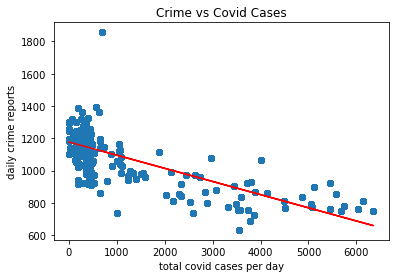

In [162]:
#bx_covid per day
#x_values= NYC_df['DATE']
#y_values = NYC_df['BX_CASE_COUNT']

#plt.scatter(x_values, y_values)
#plt.title('Covid Cases')
#plt.xlabel('total covid cases per day')
#plt.ylabel('daily crime reports')

# investigate outlier
#plt.show()


x_values= NYC_df['CASE_COUNT']
y_values = NYC_df['crime_count']

plt.scatter(x_values, y_values)
plt.title('Crime vs Covid Cases')
plt.xlabel('total covid cases per day')
plt.ylabel('daily crime reports')

# Linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print("Line equation is " + line_eq)

# investigate outlier
plt.show()

In [163]:
unique_boro = NYC_df["PATROL_BORO"].unique()
unique_boro

array(['BX', 'BK', 'MN', 'SI', 'QN', 'N/A'], dtype=object)

50721
50721
Line equation is y = -0.06x + 255.1
0.3350646220994635


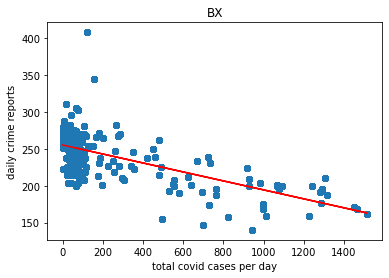

None
66965
66965
Line equation is y = -0.08x + 343.11
0.4314226608856064


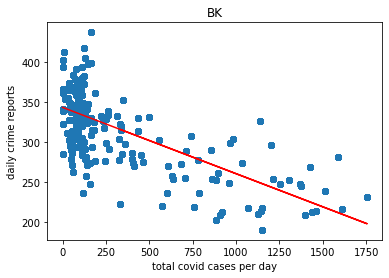

None
52335
52335
Line equation is y = -0.2x + 287.77
0.11229100871271401


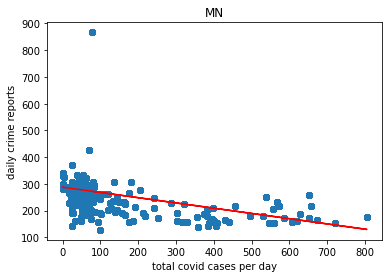

None
9473
9473
Line equation is y = -0.03x + 47.96
0.0855623599491911


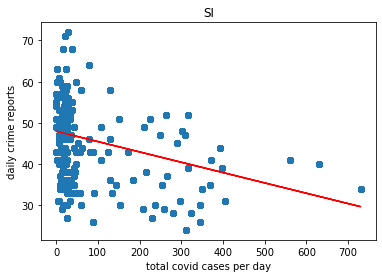

None
49891
49891
Line equation is y = -0.06x + 257.07
0.5156023800992449


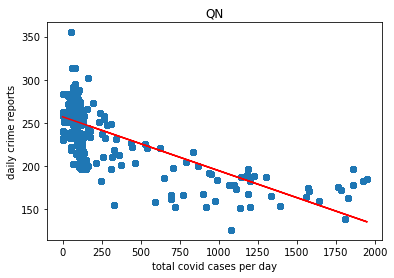

None


In [179]:
BX_x = []
BX_y = []
BK_x = []
BK_y = []
MN_x =[]
MN_y = []
SI_x = []
# SI_y = []
# QN_x = []
# QN_y = []


# for index,row in NYC_df.iterrows():
#     if row["PATROL_BORO"]=="BX":
#         BX_x.append(row["BX_CASE_COUNT"])
#         BX_y.append(row["BORO_CRIME"])
#     elif row["PATROL_BORO"]=="BK":
#         BK_x.append(row["BK_CASE_COUNT"])
#         BK_y.append(row["BORO_CRIME"])
        
#     elif row["PATROL_BORO"]=="MN":
#         MN_x.append(row["MN_CASE_COUNT"])
#         MN_y.append(row["BORO_CRIME"])
        
#     elif row["PATROL_BORO"]=="QN":
#         QN_x.append(row["QN_CASE_COUNT"])
#         QN_y.append(row["BORO_CRIME"])
    
#     elif row["PATROL_BORO"]=="SI":
#         SI_x.append(row["SI_CASE_COUNT"])
#         SI_y.append(row["BORO_CRIME"])
        
# print(len("BX_x"))
# print(len("BX_y"))



for boro in unique_boro:
    if boro != "N/A":
        x_values= NYC_df.loc[NYC_df["PATROL_BORO"]==boro][f"{boro}_CASE_COUNT"]

        y_values = NYC_df.loc[NYC_df["PATROL_BORO"]==boro]["BORO_CRIME"]
        
        print(len(x_values))
        print(len(y_values))
        plt.scatter(x_values, y_values)
        plt.title(boro)
        plt.xlabel('total covid cases per day')
        plt.ylabel('daily crime reports')

#     #     # Linear regression model

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(x_values,regress_values,"r-")
        print("Line equation is " + line_eq)
        print(rvalue**2)

#     #     # investigate outlier
        print(plt.show())

In [176]:
bronx_df = NYC_df.loc[NYC_df["PATROL_BORO"]=="BX"]
bronx_df

,Unnamed: 0,CMPLNT_NUM,DATE,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,...,BK_CASE_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BORO_CRIME,crime_count
0,0,798923821,2/29/2020,PETIT LARCENY,18-24,WHITE HISPANIC,M,BX,65+,WHITE HISPANIC,...,0,0,1,0,0,0,0,0,252,1101
4,4,339344566,2/29/2020,GRAND LARCENY,N/A,N/A,N/A,BX,25-44,WHITE HISPANIC,...,0,0,1,0,0,0,0,0,252,1101
10,10,432112360,2/29/2020,SEX CRIMES,25-44,BLACK,M,BX,<18,BLACK,...,0,0,1,0,0,0,0,0,252,1101
22,22,644216163,2/29/2020,SEX CRIMES,25-44,BLACK,M,BX,<18,BLACK,...,0,0,1,0,0,0,0,0,252,1101
29,29,794330646,2/29/2020,HARRASSMENT 2,45-64,BLACK,F,BX,45-64,BLACK,...,0,0,1,0,0,0,0,0,252,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229665,229665,532685569,9/29/2020,ASSAULT 3 & RELATED OFFENSES,45-64,BLACK,M,BX,45-64,BLACK,...,334,2,81,0,174,2,33,0,238,1147
229669,229669,613375823,9/29/2020,HARRASSMENT 2,65+,WHITE HISPANIC,M,BX,25-44,UNKNOWN,...,334,2,81,0,174,2,33,0,238,1147
229672,229672,717291904,9/29/2020,DANGEROUS WEAPONS,N/A,N/A,N/A,BX,UNKNOWN,UNKNOWN,...,334,2,81,0,174,2,33,0,238,1147
229675,229675,778560263,9/29/2020,CRIMINAL MISCHIEF & RELATED OF,UNKNOWN,UNKNOWN,U,BX,25-44,BLACK,...,334,2,81,0,174,2,33,0,238,1147


<AxesSubplot:title={'center':'Crime Type Distribution'}, ylabel='OFNS_DESC'>

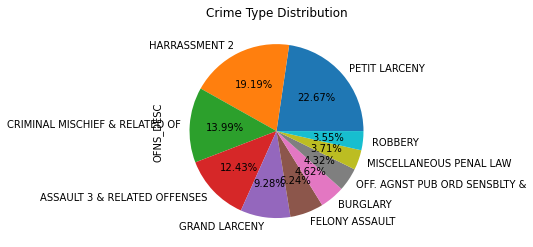

In [194]:
crime_distib = NYC_df['OFNS_DESC'].value_counts().head(10)
crime_distib.plot.pie(title='Crime Type Distribution', legend = False, autopct="%1.2f%%")

In [ ]:
print(crime_distib)

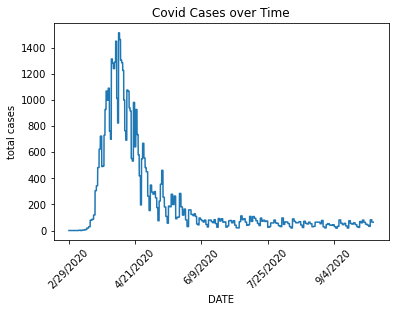

In [181]:
plot = NYC_df.plot.line(x='DATE', y='BX_CASE_COUNT', 
                            title='Covid Cases over Time',
                            ylabel = 'total cases', legend=False, rot=45)


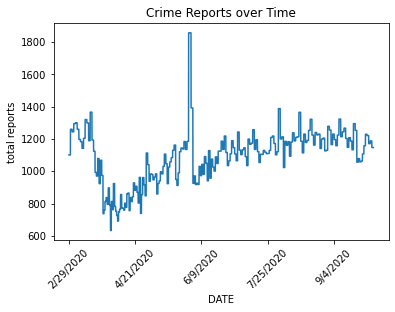

In [183]:
plot2 = NYC_df.plot.line(x='DATE', y='crime_count', 
                           title='Crime Reports over Time',
                            ylabel = 'total reports', legend=False, rot = 45)

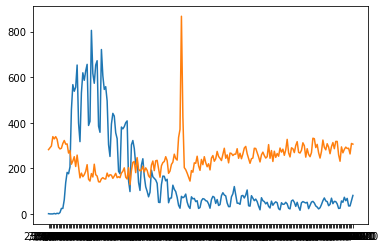

In [192]:
plt.plot(NYC_df.loc[NYC_df["PATROL_BORO"]=="MN"]["DATE"], NYC_df.loc[NYC_df["PATROL_BORO"]=='MN']["MN_CASE_COUNT"])
plt.plot(NYC_df.loc[NYC_df["PATROL_BORO"]=="MN"]["DATE"], NYC_df.loc[NYC_df["PATROL_BORO"]=='MN']["BORO_CRIME"])
plt.show()

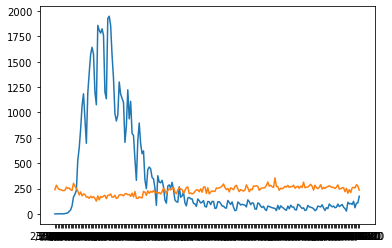

In [193]:
plt.plot(NYC_df.loc[NYC_df["PATROL_BORO"]=="QN"]["DATE"], NYC_df.loc[NYC_df["PATROL_BORO"]=='QN']["QN_CASE_COUNT"])
plt.plot(NYC_df.loc[NYC_df["PATROL_BORO"]=="QN"]["DATE"], NYC_df.loc[NYC_df["PATROL_BORO"]=='QN']["BORO_CRIME"])
plt.show()